#  <a href="Wells Fargo"><img src="wells_fargo_logo.png" width="100"> </a>
# Wells Fargo L1 Assignment

## Objective
### To answer the questions, find the insights from given data and build and compare machine learning models.


  * Q1 Write the code for below sub-questions
    - Generate last 3 rows of dataset
    - Print First, second and last row in the Dataframe
    - Print the 2 rows just before the last 3 rows in the Dataframe
    - Summarize the data as an analyst  
  * Q2 Subset the above DataFrame for age>35
  * Q3 Find relation between Age, Sex and Target Variable
  * Q4 Generate Box plot to detect outliers
  * Q5 Split the dataset into training and test sets
  * Q6 Train the Model using training dataset
  * Q7 Generate Predictions using Test dataset
  * Q8 Calculate MSE for the predictions
  * Q9 Can you evaluate your models
  * Q10 Which model would you suggest
  * Q11 What would be you model monitoring strategy, which key performance statistical metrics you will consider while looking at model performance


In [1]:
# Import scikit learn library
from sklearn.datasets import load_diabetes
import warnings #to avoid warning notifications and increase the readability
warnings.filterwarnings("ignore")

###### Load Data

In [2]:
df=load_diabetes(as_frame=True,scaled=False)

###### check the documentation of the data

In [3]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
print(df.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
print(df.target)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [6]:
# print(df.frame)
# type(df)
df.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [7]:
import pandas as pd
diabetes_data=df.frame

In [8]:
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [9]:
# To get shape of the dataset (row,column)
diabetes_data.shape

(442, 11)

In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
diabetes_data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [12]:
diabetes_data.rename({'s1':'tc',
                     's2':'ldl',
                     's3':'hdl',
                     's4':'tch',
                      's5':'ltg',
                      's6':'glu'},inplace=True,axis=1)

In [13]:
diabetes_data.columns

Index(['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'target'],
      dtype='object')

## Problem Solving
## -------------------

#### Q1.1  Generate last 3 rows of dataset

In [14]:
print(diabetes_data.tail(3))
# diabetes_data.tail(3)

      age  sex   bmi     bp     tc    ldl   hdl   tch     ltg   glu  target
439  60.0  2.0  24.9  99.67  162.0  106.6  43.0  3.77  4.1271  95.0   132.0
440  36.0  1.0  30.0  95.00  201.0  125.2  42.0  4.79  5.1299  85.0   220.0
441  36.0  1.0  19.6  71.00  250.0  133.2  97.0  3.00  4.5951  92.0    57.0


#### Q1.2 Print First, second and last row in the Dataframe

In [15]:
# diabetes_data.iloc[[1,2,-1]]
print(diabetes_data.iloc[[1,2,-1]])

      age  sex   bmi    bp     tc    ldl   hdl  tch     ltg   glu  target
1    48.0  1.0  21.6  87.0  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2    72.0  2.0  30.5  93.0  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
441  36.0  1.0  19.6  71.0  250.0  133.2  97.0  3.0  4.5951  92.0    57.0


#### Q1.3 Print the 2 rows just before the last 3 rows in the Dataframe

In [16]:
# diabetes_data.iloc[[-5:-3]]
print(diabetes_data.iloc[-5:-3])

      age  sex   bmi     bp     tc    ldl   hdl  tch     ltg    glu  target
437  60.0  2.0  28.2  112.0  185.0  113.8  42.0  4.0  4.9836   93.0   178.0
438  47.0  2.0  24.9   75.0  225.0  166.0  42.0  5.0  4.4427  102.0   104.0


#### Q1.4 Summarize the data as an analyst

In [17]:
diabetes_data.describe(include='all')

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


 - Mean age is 48.5 years of the sample, **Oldest sample is 79 years old and youngest is 19 years old**
 - Unique gender in the data - 2
 - Average BMI - 26.3 , **Median BMI - 25.7**, Minimum BMI in sample - 18 (Between 18 and 25 is a healthy person, **Atleast half of the sample is overweight**)
 - Average or High BMI seems to be common in dataset as there is **no** underweight patient. Diabetes can be linked with high weight with more research on it
 - Mean BP (94.6) and Median BP (93) seems to be within healthy range (80 -120). Also SD is ~13, mean BP+1SD and mean-1SD also seems to be in healthy range. **Atleast 68.6% people have healthy BP in the sample**
 - Mean glucose level is 91.2 with SD as 11 and **median** as 91, We can say that more than 50% of the sample as glucose level within range

  - Total rows of data - 442
  - Number of Columns in dataframe - 11 (10 features, 1 target)
  - Target column data value type - continuous
  - Its a Regression problem as target is Continuous

#### Q2 Subset the DataFrame for age>35

In [18]:
# subsetting the patient aged above 35 in wine_data_35 variable
diabetes_data_35=diabetes_data[diabetes_data.age>35]
print(diabetes_data_35.shape)
# print(diabetes_data_35)

(357, 11)


#### Q3 Find relation between Age, Sex and Target Variable

In [19]:
diabetes_data[['age','sex','target']].corr()

,age,sex,target
age,1.000000,0.173737,0.187889
sex,0.173737,1.000000,0.043062
target,0.187889,0.043062,1.000000


 - Both age and sex a weak and positive correlation with target
 - Sex has very weak correlation, we can infer that both genders are equally susceptible to develop diabetes

#### Q4 Generate Box plot to detect outliers.

In [20]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

[]

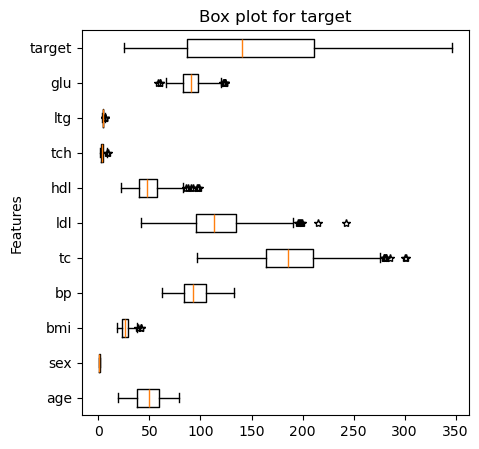

In [21]:
# As all the data points are float types, we can plot box plot for every feature along with the target
fig,ax = plt.subplots(figsize=(5,5))
ax.boxplot(x=diabetes_data,
           vert=False,
           labels=diabetes_data.columns,
           sym='*'
          )
plt.title('Box plot for target')
plt.ylabel('Features')
plt.plot()

 - based on box plot :-
   - tc total serum cholesterol have outlier values,
   - ldl low density lipoproteins have outlier values,
   - hdl high density lipoproteins have outlier values,
   - tch Total cholestrol have outlier values,
   - ltg log of serum triglycerides level have outlier values,
   - glu Blood sugar level have outlier values
 - Target seems to be well spread across range

####  Q5 Split the dataset into training and test sets.

In [22]:
# import model_selection library
from sklearn.model_selection import train_test_split
X=diabetes_data.drop(['target'],axis=1)
y=diabetes_data['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)

In [23]:
# check the train and test data 
print('Shape of training feature set :',X_train.shape)
print('Shape of training target set :',y_train.shape)
print('Shape of test feature set :',X_test.shape)
print('Shape of test target set :',y_test.shape)


Shape of training feature set : (331, 10)
Shape of training target set : (331,)
Shape of test feature set : (111, 10)
Shape of test target set : (111,)


#### Q6 Train the Model using training dataset.

In [24]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [25]:
# Checking intercept and coffeicient
print(lr.coef_)
print(lr.intercept_)

[  0.10849581 -23.32694968   5.35612228   1.08831909  -1.10795296
   0.70089676   0.40710685  10.31636603  62.33450523   0.32080048]
-314.9260843103531


#### Q7 Generate Predictions using Test dataset.

In [26]:
y_pred=lr.predict(X_test)

#### Q8 Calculate MSE for the predictions
#### Can you evaluate your models?data
  - Yes, Models can be evaluated based on predicted data
  - We can compare the predicted and actual values
  - Model evaluation can be done based on 4 different scores for linear regression
  - Those scores are Mean absolute error, mean squared error, root mean squared error and r2 score
N}N}

In [27]:
# To Evaluate model
# We will evaluate model with MAE, MSE, R2 and RMSE
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
lr_r2=r2_score(y_test,y_pred)
lr_mae=mean_absolute_error(y_test,y_pred)
lr_mse=mean_squared_error(y_test,y_pred)
lr_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [28]:
print('R2 score : ',lr_r2)
print('Mean Absolute error : ',lr_mae)
print('Mean Squard error : ',lr_mse)
print('Root Mean Squared error : ',lr_rmse)

R2 score :  0.5101622957584463
Mean Absolute error :  44.10541595909152
Mean Squard error :  2912.3162552445465
Root Mean Squared error :  53.9658804731707


In [29]:
# Doing same operation on scaled data to avoid impact of magnitude of the avalable data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(diabetes_data)
diabetes_data_scaled=scaler.transform(diabetes_data)
diabetes_data_scaled =pd.DataFrame(diabetes_data_scaled,columns=diabetes_data.columns)
# print(diabetes_data_scaled.shape)
X=diabetes_data_scaled.drop(['target'],axis=1)
y=diabetes_data_scaled['target']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)

# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Evaluate model on scaled data
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
lrs_r2=r2_score(y_test,y_pred)
lrs_mae=mean_absolute_error(y_test,y_pred)
lrs_mse=mean_squared_error(y_test,y_pred)
lrs_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

# score on scaled data
print('R2 score {0}  R2 score scaled {1}: '.format(lr_r2,lrs_r2))
print('Mean Absolute error : ',lrs_mae)
print('Mean Squard error : ',lrs_mse)
print('Root Mean Squared error : ',lrs_rmse)

R2 score 0.5101622957584463  R2 score scaled 0.5101622957584456: 
Mean Absolute error :  0.13740004971679604
Mean Squard error :  0.02826366451455779
Root Mean Squared error :  0.16811800770458168


In [30]:
#packaging other model inside a function
from sklearn.ensemble import RandomForestRegressor
def randomforestregressor(data):
    """
    The function invokes RandomForestRegressor. It accepts the dataframe
    with all integer datatype column and dependant variable named as 'target' and returns r2_Score.
    """
    X=data.drop(['target'],axis=1)
    y=pd.DataFrame(diabetes_data['target'],columns=['target'])
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)
    rfr=RandomForestRegressor()
    rfr.fit(X_train,y_train)
    y_pred=rfr.predict(X_test)
    rfr_score=r2_score(y_test,y_pred)
    return rfr_score   

In [31]:
# PAssing the data to function that invokes the model and getting the score as output 
rfr_r2=randomforestregressor(diabetes_data)
print(rfr_r2)

0.489311428846128


In [32]:
# Function to scale the data
from sklearn.preprocessing import MinMaxScaler
def scaling(data):
    """
    The function uses MinMaxScaler to scale the data. After scaling, data ranges between 0 and 1.
    """
    scaler = MinMaxScaler()
    scaler.fit(data)
    data_scaled=scaler.transform(data)
    data_scaled =pd.DataFrame(data_scaled,columns=data.columns)
    return data_scaled

In [33]:
# Calling scaling function to scale the data and passing the scaled data to RandomforestRegressor model to get r2 score
data=scaling(diabetes_data)
rfrs_r2=randomforestregressor(data)
print(rfrs_r2)

0.4961018035153718


In [34]:
# Storing the scores of models in different variables
# sc=[lr_r2,lrs_r2,rfr_r2,rfrs_r2]
metrics_score_name=['lr_r2','lrs_r2','rfr_r2','rfrs_r2']
metrics_score=[lr_r2,lrs_r2,rfr_r2,rfrs_r2]

In [35]:
# # SGDRegressor for modelling
# from sklearn.linear_model import SGDRegressor
# def sgdregressor(data):
#     """
#     SGD Regressor implementation with the function
#     """
#     sgdr=SGDRegressor()
#     X=data.drop(['target'],axis=1)
#     y=pd.DataFrame(diabetes_data['target'],columns=['target'])
#     X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)
#     sgdr.fit(X_train,y_train)
#     y_pred=sgdr.predict(X_test)
#     sgdr_score=r2_score(y_test,y_pred)
#     return sgdr_score

# #calling the function to get the r2 score
# sgdr_r2=sgdregressor(diabetes_data)
# metrics_score_name.append(f'sgdr_r2')
# metrics_score.append(sgdr_r2)
# print(sgdr_r2)

In [36]:
#Ridge  for modelling
from sklearn.linear_model import Ridge
def ridge(data):
    """
    Ridge Regression implementation
    """
    X=data.drop(['target'],axis=1)
    y=pd.DataFrame(diabetes_data['target'],columns=['target'])
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)
    r=Ridge()
    r.fit(X_train,y_train)
    y_pred=r.predict(X_test)
    r_score=r2_score(y_test,y_pred)
    return r_score

#calling the function to get the r2 score
r_r2=ridge(data)
metrics_score_name.append(f'r_r2')
metrics_score.append(r_r2)
print(r_r2)

0.5019744699202742


In [37]:
from sklearn.linear_model import ARDRegression
def ardregressor(data):
    """
    Fit the weights of a regression model, using an ARD prior.
    The weights of the regression model are assumed to be
    in Gaussian distributions. Also estimate the parameters
    lambda (precisions of the distributions of the weights)
    and alpha (precision of the distribution of the noise). 
    The estimation is done by an iterative procedures (Evidence Maximization)
    """
    ardr=ARDRegression()
    X=data.drop(['target'],axis=1)
    y=pd.DataFrame(diabetes_data['target'],columns=['target'])
    X_train,X_test,y_train,y_test= train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=123)
    ardr.fit(X_train,y_train)
    y_pred=ardr.predict(X_test)
    ardr_score=r2_score(y_test,y_pred)
    return ardr_score

ardr_r2=ardregressor(data)
metrics_score_name.append(f'ardr_r2')
metrics_score.append(ardr_r2)
print(ardr_r2)
    

0.517007116996903


   Metrics     Score
0    lr_r2  0.510162
1   lrs_r2  0.510162
2   rfr_r2  0.489311
3  rfrs_r2  0.496102
4     r_r2  0.501974
5  ardr_r2  0.517007


Text(0.5, 0, 'Score')

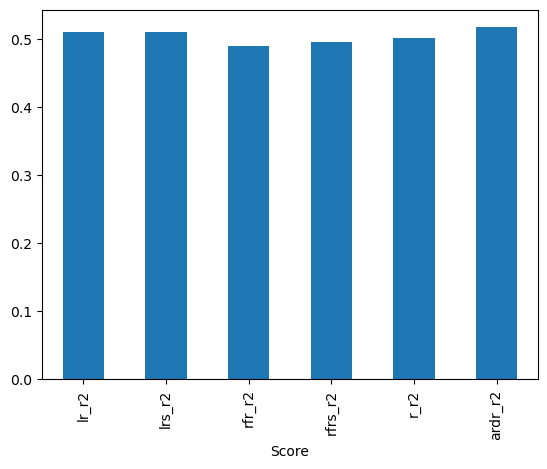

In [38]:
print(pd.DataFrame({'Metrics':metrics_score_name,'Score':metrics_score}))
fig=plt.subplots()
pd.Series(metrics_score,index=metrics_score_name).plot(kind='bar')
plt.xlabel('Score')

## Implementing models using pipeline and all the models for faster execution

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ARDRegression,SGDRegressor, HuberRegressor,QuantileRegressor,PoissonRegressor

In [40]:
# train test split for  
X=data.drop(['target'],axis=1)
y=pd.DataFrame(diabetes_data['target'],columns=['target'])
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)

In [41]:
pipeline = Pipeline([('scaler', MinMaxScaler()) , ## Transform step of pipeline
                     ('regressor', LinearRegression()) ## last step as predictor
                    ])

param_grid = [
    { 'regressor': [LinearRegression()] },
    { 'regressor': [Ridge()],'regressor__alpha': [0.001,0.0001,0.1, 1.0, 10.0] },
     { 'regressor': [RandomForestRegressor()],'regressor__ccp_alpha': [0.001,0.0001,0.1, 1.0, 10.0],
      'regressor__n_estimators':[10,50,100],'regressor__min_samples_split':[1,5,10],'regressor__max_features':['sqrt', 'log2'] }
    # { 'regressor': [Lasso()],'regressor__alpha': [0.001,0.0001,0.1, 1.0, 10.0] },
    # { 'regressor': [ARDRegression()],'regressor__alpha_1': [0.001,0.0001,0.1, 1.0, 10.0]},
    # { 'regressor': [HuberRegressor()],'regressor__alpha': [0.001,0.0001,0.1, 1.0, 10.0] },
    # { 'regressor': [QuantileRegressor()],'regressor__alpha': [0.001,0.0001,0.1, 1.0, 10.0] },
    # { 'regressor': [PoissonRegressor()],'regressor__alpha': [0.001,0.0001,0.1, 1.0, 10.0] },
    # { 'regressor': [SGDRegressor()],'regressor__alpha': [0.001,0.0001,0.1, 1.0, 10.0] }
    ]

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
final_score = r2_score(y_test, y_pred)

In [42]:
#best score in training
final_score

0.5101622957584457

In [43]:
grid_search.best_params_

{'regressor': LinearRegression()}

In [44]:
#best model for our data among implemented models
best_model

Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [45]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('regressor', LinearRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'regressor': LinearRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__n_jobs': None,
 'regressor__positive': False}

### Further study
### Hyperparameter tuning with more features
### More models and understanding advantage and disadvantage


# End Of File